In [1]:
# Import dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")
from pitch_abbrev import pitch_abbrev

Drew Hutchinson:
- UCL injury around 6/16/12

In [2]:
# Import csv file with pitcher data
pitcher = pd.read_csv("Hutchinson_Drew.csv")
pitcher.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2018-08-31,89.6,-3.57,5.93,"Hutchison, Drew",593871,571800,double,hit_into_play,...,6,3,6,3,6,Standard,Standard,193.0,-0.086,0.856
1,FF,2018-08-31,89.6,-3.66,5.80,"Hutchison, Drew",593871,571800,NaN,ball,...,6,1,6,1,6,Standard,Standard,199.0,0.000,0.210
2,FF,2018-08-31,89.2,-3.62,5.88,"Hutchison, Drew",593871,571800,NaN,called_strike,...,6,1,6,1,6,Standard,Standard,193.0,0.000,-0.096
3,FT,2018-08-31,88.7,-3.58,5.84,"Hutchison, Drew",593871,571800,NaN,blocked_ball,...,6,1,6,1,6,Standard,Standard,228.0,0.000,0.081
4,SL,2018-08-31,77.3,-3.86,5.71,"Hutchison, Drew",593871,571800,NaN,ball,...,6,1,6,1,6,Standard,Standard,54.0,0.000,0.058


In [3]:
# Calculate the number of different types of pitches
pitch_count = pitcher.groupby("pitch_type").count()
pitch_count = pitch_count[["release_speed"]]
pitch_count = pitch_count.rename(columns={"release_speed": "number_of_pitches"})
pitch_count

,number_of_pitches
pitch_type,
CH,884
CU,2
FA,3
FF,4657
FT,294
IN,1
PO,3
SL,1736


In [4]:
# Pitches with less than 50 data points will be removed
pitcher = pitcher.merge(pitch_count, on="pitch_type")
pitcher = pitcher.loc[pitcher["number_of_pitches"]>50]
pitcher.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,number_of_pitches
0,FF,2018-08-31,89.6,-3.57,5.93,"Hutchison, Drew",593871,571800,double,hit_into_play,...,3,6,3,6,Standard,Standard,193.0,-0.086,0.856,4657
1,FF,2018-08-31,89.6,-3.66,5.80,"Hutchison, Drew",593871,571800,NaN,ball,...,1,6,1,6,Standard,Standard,199.0,0.000,0.210,4657
2,FF,2018-08-31,89.2,-3.62,5.88,"Hutchison, Drew",593871,571800,NaN,called_strike,...,1,6,1,6,Standard,Standard,193.0,0.000,-0.096,4657
3,FF,2018-08-31,88.3,-3.53,5.96,"Hutchison, Drew",408045,571800,NaN,called_strike,...,1,6,1,6,Standard,Strategic,210.0,0.000,-0.099,4657
4,FF,2018-08-31,88.2,-3.64,5.91,"Hutchison, Drew",408045,571800,NaN,ball,...,1,6,1,6,Standard,Strategic,214.0,0.000,0.104,4657


In [5]:
# Get pitch types
pitch_types = pitcher.groupby("pitch_type").count()
pitch_types = pitch_types.index.values
pitch_types

array(['CH', 'FF', 'FT', 'SL'], dtype=object)

In [6]:
# Sort into data frames by pitch type
pitches = []
for pitch in pitch_types:
    pitches.append([pitcher.loc[pitcher["pitch_type"]==pitch], pitch_abbrev[pitch]])

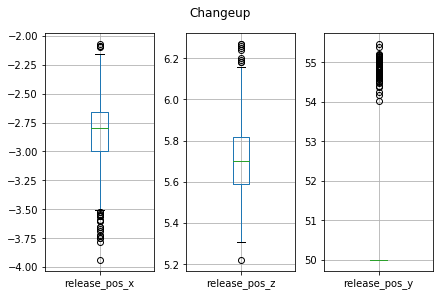

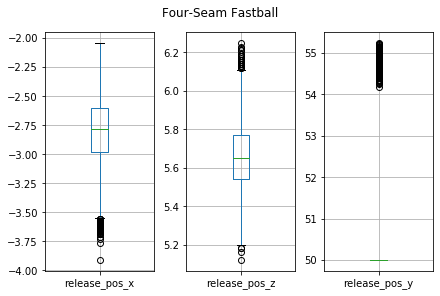

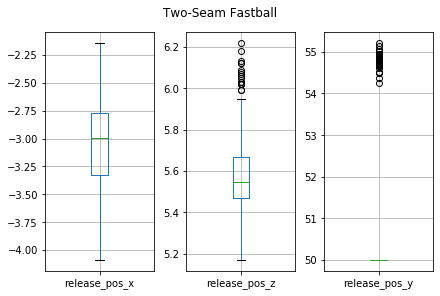

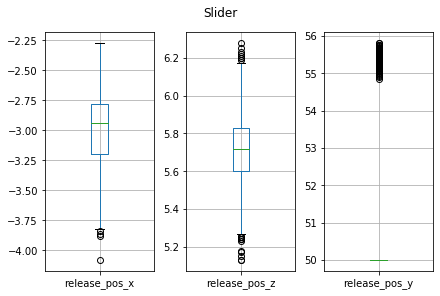

In [7]:
# Create box plot for each pitch type to look at outliers from mean relase point
for pitch in pitches:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(6,4), constrained_layout=True)
    pitch[0].boxplot(column=["release_pos_x"], ax=ax[0])
    pitch[0].boxplot(column=["release_pos_z"], ax=ax[1])
    pitch[0].boxplot(column=["release_pos_y"], ax=ax[2])
    fig.suptitle(pitch[1])
    plt.show()

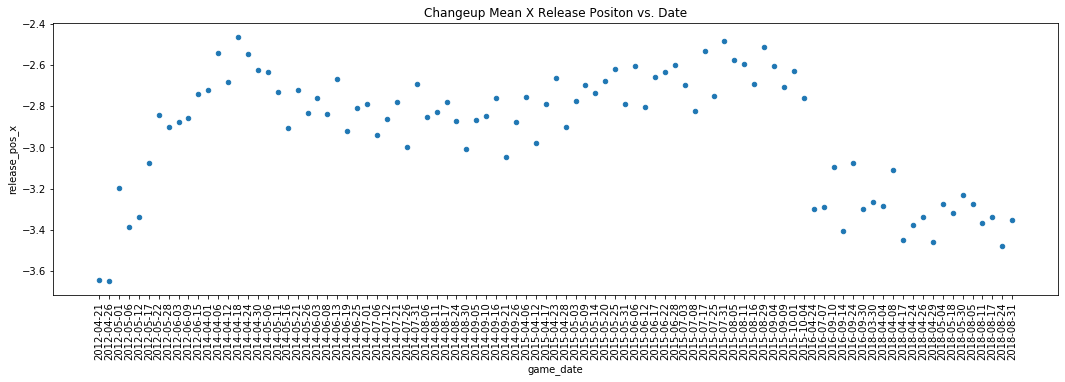

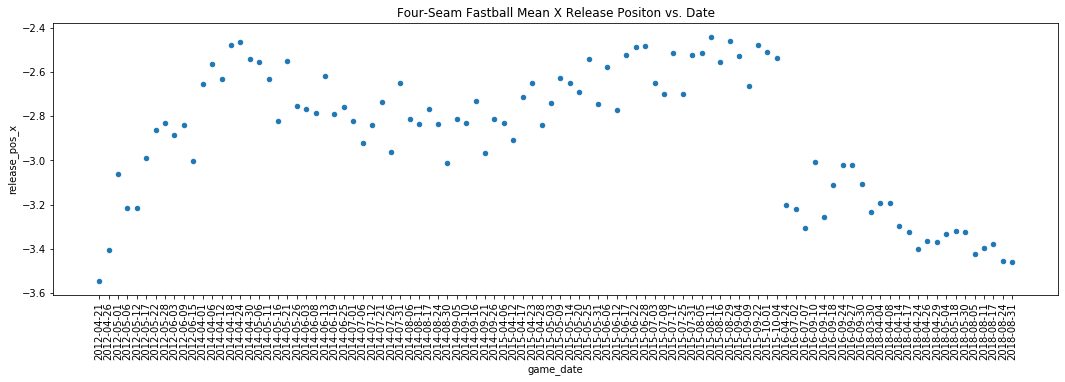

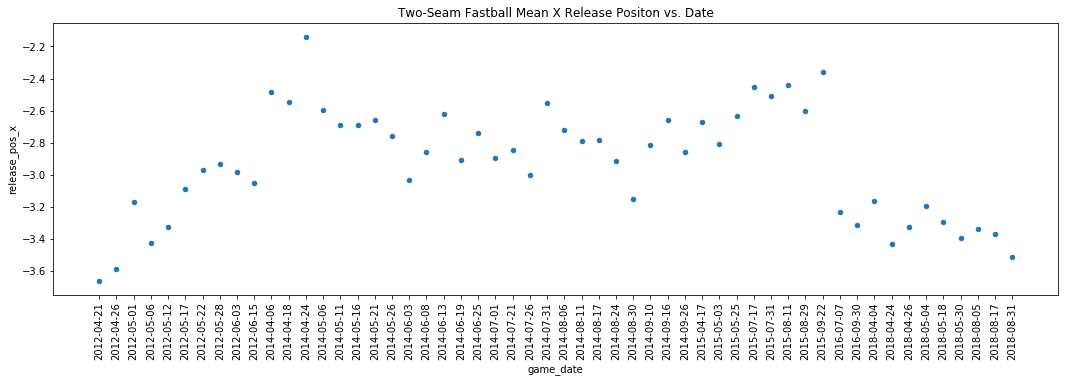

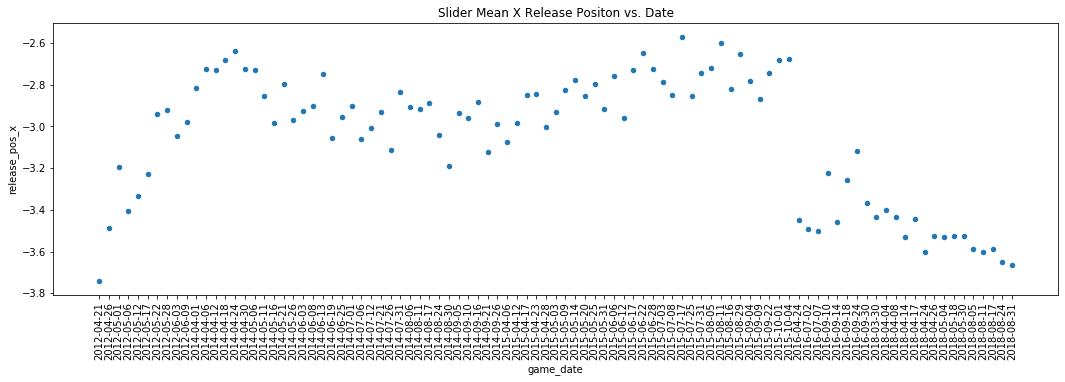

In [8]:
# Plot mean pitch release X location at each game
for pitch in pitches:
    graph = pitch[0].groupby("game_date").mean()
    graph = graph.reset_index()
    ax = graph.plot(kind="scatter", x="game_date", y="release_pos_x",  
              title=f"{pitch[1]} Mean X Release Positon vs. Date", rot=90, figsize=(18,5))

A trend can be seen of a change in x-axis release point around 4/21/12 - 4/1/14 and again around 4/24/16

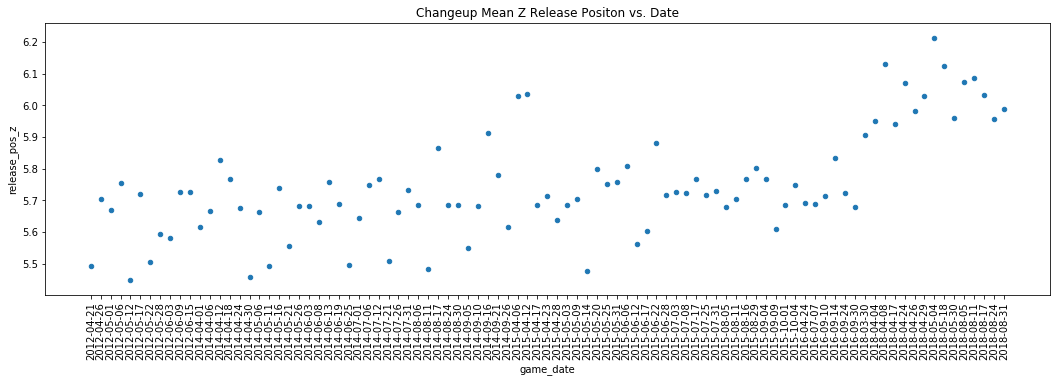

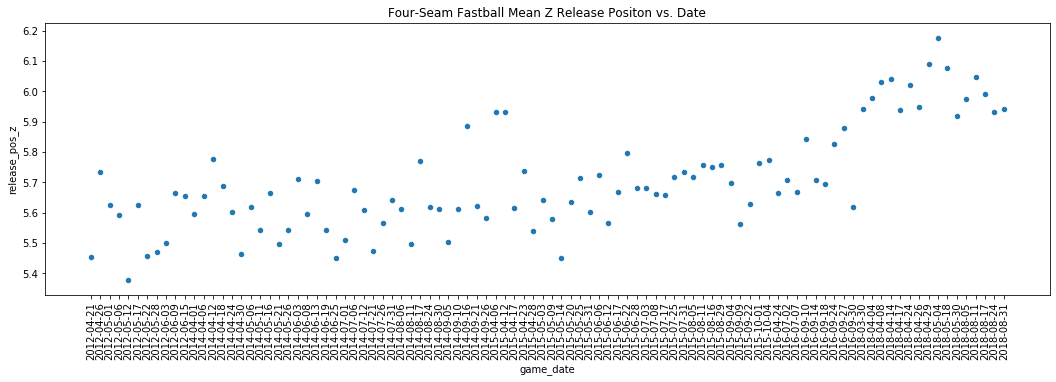

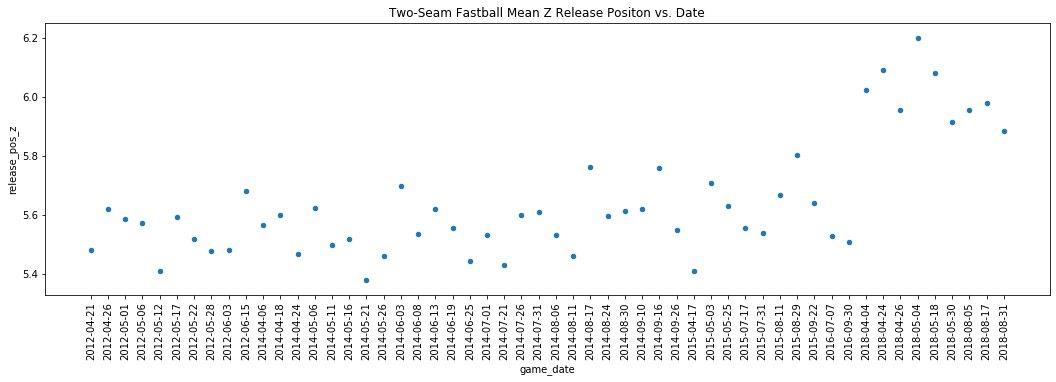

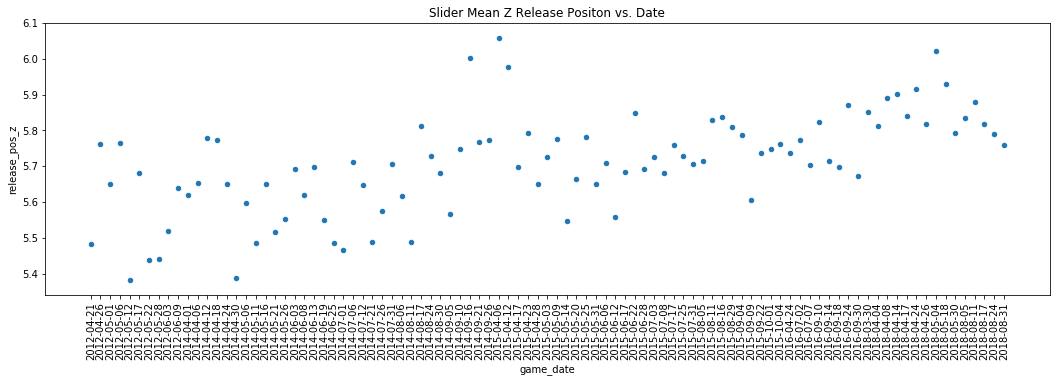

In [9]:
# Plot mean pitch release Z location at each game
for pitch in pitches:
    graph = pitch[0].groupby("game_date").mean()
    graph = graph.reset_index()
    ax = graph.plot(kind="scatter", x="game_date", y="release_pos_z", 
              title=f"{pitch[1]} Mean Z Release Positon vs. Date", rot=90, figsize=(18,5))

A trend can be seen of a change in z-axis release point around 4/4/18

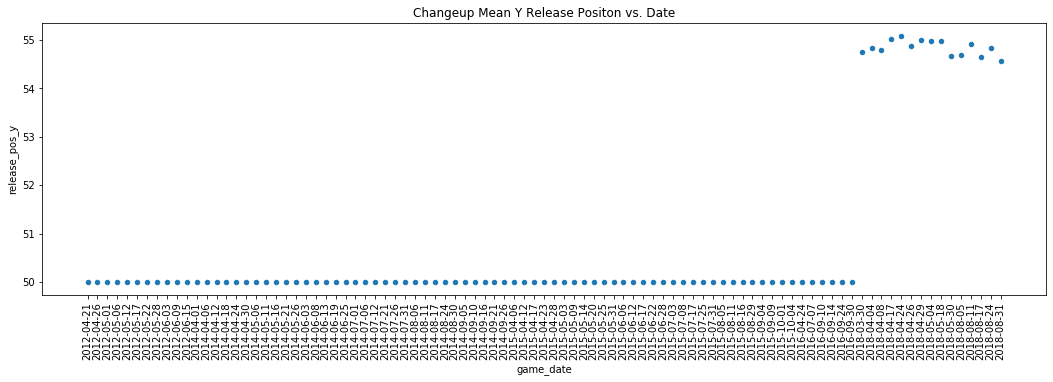

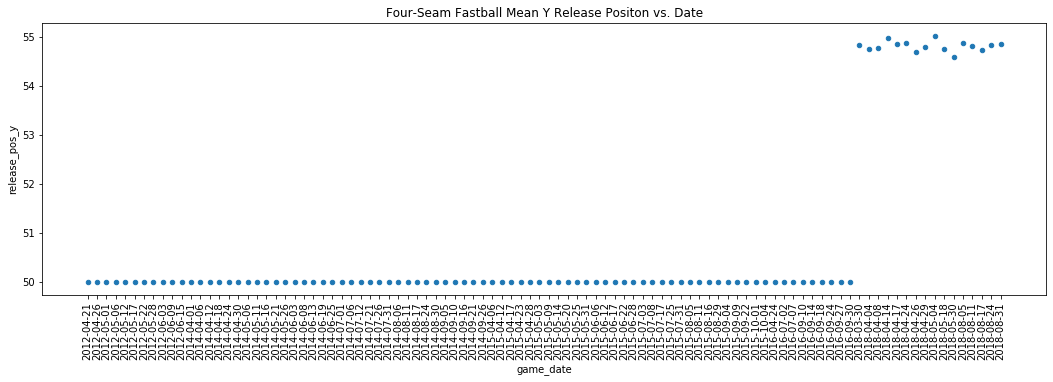

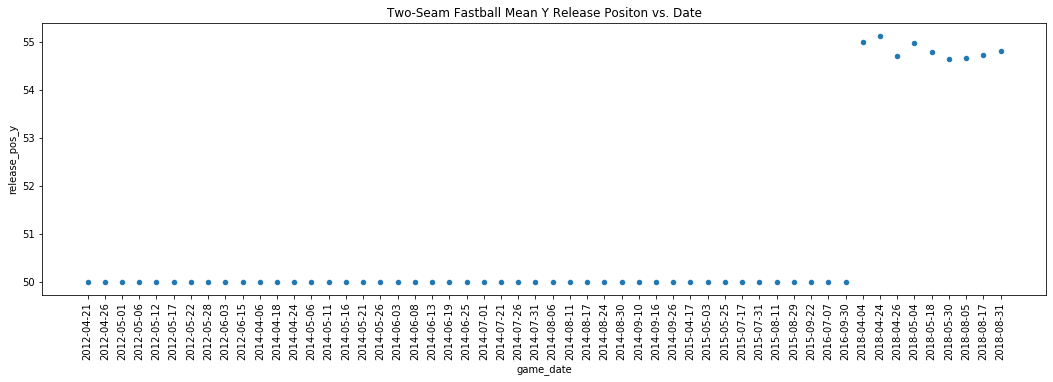

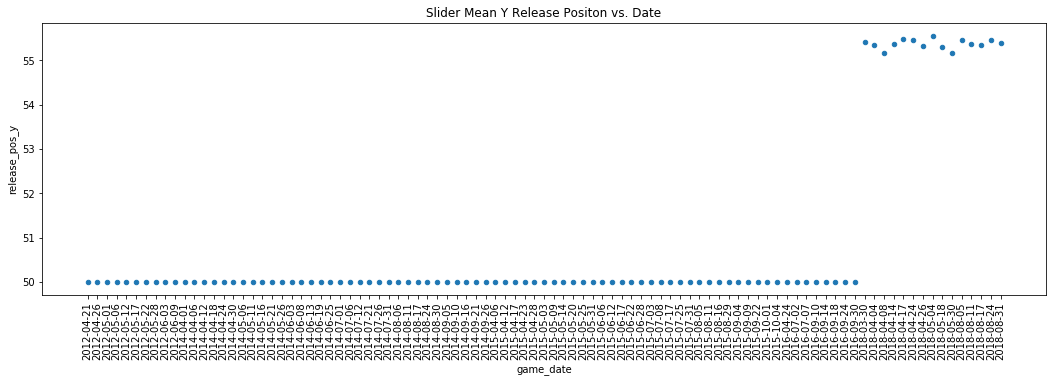

In [10]:
# Plot mean pitch release Y location at each game
for pitch in pitches:
    graph = pitch[0].groupby("game_date").mean()
    graph = graph.reset_index()
    ax = graph.plot(kind="scatter", x="game_date", y="release_pos_y", 
              title=f"{pitch[1]} Mean Y Release Positon vs. Date", rot=90, figsize=(18,5))

The y-axis data being 50 for several dates may be incorrect/inconclusive.
Further investigation needed into a possible cause. Y-axis data will not be used for further analysis.

In [11]:
# Investigate dates around 7/2012 (UCL Injury)
date = ["2013-01-01"]
inj_pitches = []
for pitch in pitches:
    if (len(date)==1):
        inj_pitches.append([pitch[0].loc[pitch[0]["game_date"]<date[0]], pitch[1]])
    else:
        inj_pitches.append([pitch[0].loc[(pitch[0]["game_date"]>date[0])&
                                         (pitch[0]["game_date"]<date[1])], pitch[1]])

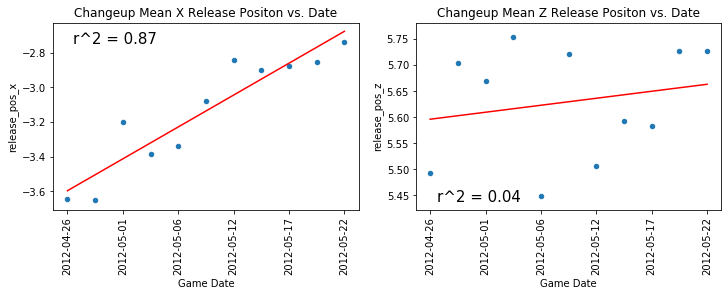

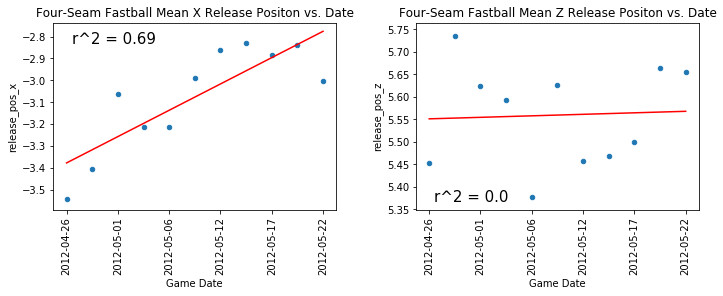

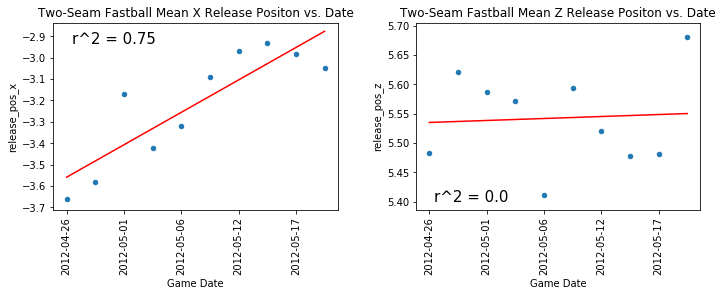

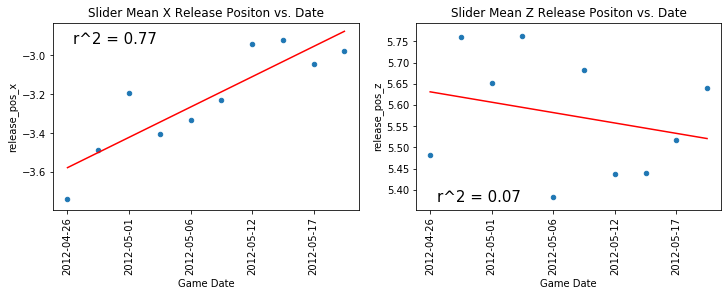

In [12]:
# Plot mean pitch release X,Z location at game date range
for pitch in inj_pitches:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4), constrained_layout=True)
    graph = pitch[0].groupby("game_date").mean()
    graph = graph.reset_index()
    x_values = np.arange(len(graph["game_date"]))
    graph["x_values"] = x_values
    graph.plot(kind="scatter", x="x_values", y="release_pos_x",   
              title=f"{pitch[1]} Mean X Release Positon vs. Date", rot=90, ax=ax[0])
    graph.plot(kind="scatter", x="x_values", y="release_pos_z",  
              title=f"{pitch[1]} Mean Z Release Positon vs. Date", rot=90, ax=ax[1])
    
    # Linear regression analysis
    (slope, intercept, rvalue, pvalue, sterr) = linregress(graph["x_values"], 
                                                           graph["release_pos_x"])
    regressValues = (slope*graph["x_values"]) + intercept
    ax[0].plot(graph["x_values"], regressValues, "red")
    ax[0].annotate(f"r^2 = {round(rvalue**2,2)}",fontsize=15,color="black",
                  xy=(.1,.85), xycoords="figure fraction")
    
    (slope, intercept, rvalue, pvalue, sterr) = linregress(graph["x_values"], 
                                                           graph["release_pos_z"])
    regressValues = (slope*graph["x_values"]) + intercept
    ax[1].plot(graph["x_values"], regressValues, "red")
    ax[1].annotate(f"r^2 = {round(rvalue**2,2)}",fontsize=15,color="black", 
                  xy=(.6,.32), xycoords="figure fraction")
    
    ax[0].set_xticklabels(graph["game_date"])
    ax[0].set_xlabel("Game Date")
    ax[1].set_xticklabels(graph["game_date"])
    ax[1].set_xlabel("Game Date")

x-axis pitch release graph shows a strong positive trend for all pitch types

In [13]:
# Compare to a baseline time period
date2 = ["2014-12-31", "2016-01-01"]
baseline_pitches = []
for pitch in pitches:
    if (len(date2)==1):
        baseline_pitches.append([pitch[0].loc[pitch[0]["game_date"]<date2[0]], pitch[1]])
    else:
        baseline_pitches.append([pitch[0].loc[(pitch[0]["game_date"]>date2[0])&
                                         (pitch[0]["game_date"]<date2[1])], pitch[1]])

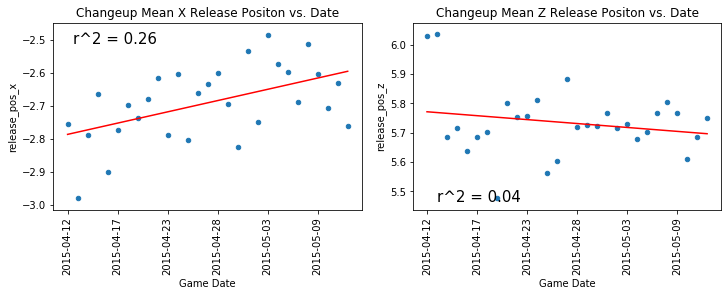

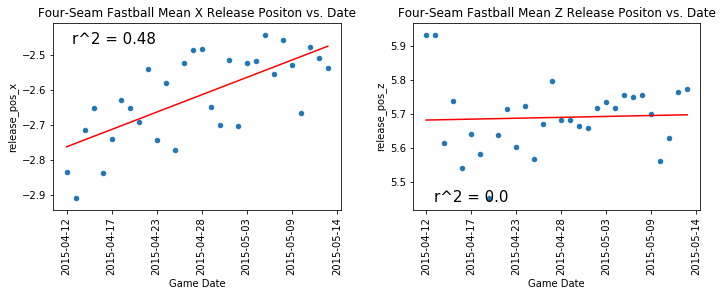

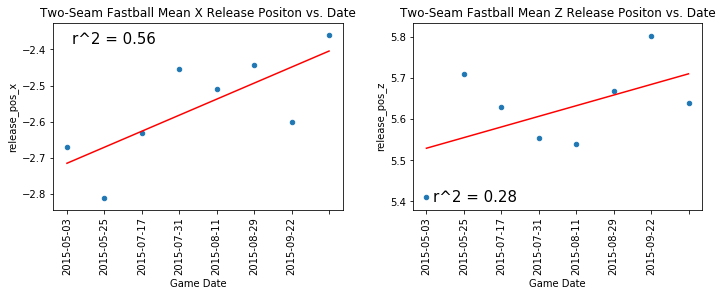

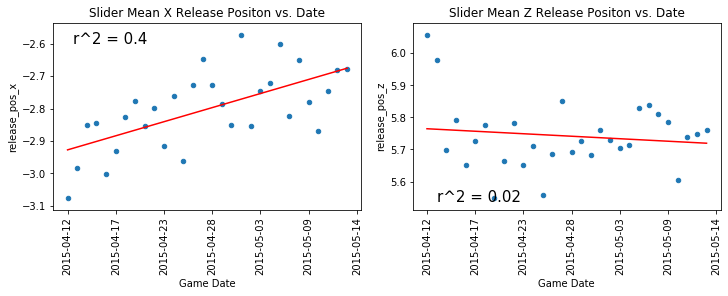

In [14]:
# Plot mean pitch release X,Z location at game date range
for pitch in baseline_pitches:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4), constrained_layout=True)
    graph = pitch[0].groupby("game_date").mean()
    graph = graph.reset_index()
    x_values = np.arange(len(graph["game_date"]))
    graph["x_values"] = x_values
    graph.plot(kind="scatter", x="x_values", y="release_pos_x",   
              title=f"{pitch[1]} Mean X Release Positon vs. Date", rot=90, ax=ax[0])
    graph.plot(kind="scatter", x="x_values", y="release_pos_z",  
              title=f"{pitch[1]} Mean Z Release Positon vs. Date", rot=90, ax=ax[1])
    
    # Linear regression analysis
    (slope, intercept, rvalue, pvalue, sterr) = linregress(graph["x_values"], 
                                                           graph["release_pos_x"])
    regressValues = (slope*graph["x_values"]) + intercept
    ax[0].plot(graph["x_values"], regressValues, "red")
    ax[0].annotate(f"r^2 = {round(rvalue**2,2)}",fontsize=15,color="black",
                  xy=(.1,.85), xycoords="figure fraction")
    
    (slope, intercept, rvalue, pvalue, sterr) = linregress(graph["x_values"], 
                                                           graph["release_pos_z"])
    regressValues = (slope*graph["x_values"]) + intercept
    ax[1].plot(graph["x_values"], regressValues, "red")
    ax[1].annotate(f"r^2 = {round(rvalue**2,2)}",fontsize=15,color="black", 
                  xy=(.6,.32), xycoords="figure fraction")
    
    ax[0].set_xticklabels(graph["game_date"])
    ax[0].set_xlabel("Game Date")
    ax[1].set_xticklabels(graph["game_date"])
    ax[1].set_xlabel("Game Date")

Simlilar trends are seen during a baseline sample time period on x-axis release points. While the trend is similar, the magnitude of the r^2 values is not as great as the trends seen prior to the injury. This can be skewed by the low volume of data points available prior to injury.